In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#above line loads the train & test digits data

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

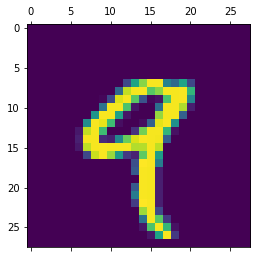

In [9]:
plt.matshow(X_train[4])

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train[4]

9

In [18]:
#scaling the values by dividing all with 255
X_train = X_train / 255
X_test = X_test / 255

In [21]:
#Flattening the 2d array into single dimensional array

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [22]:
X_train_flattened.shape

(60000, 784)

In [23]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##now lets create a simple neural network with 
##786 values of input layers and with output layer having 10 outputs

##so how to create this neural network in tensorflow???

In [24]:
model = keras.Sequential([
           keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')       
])
#here sequential means layers are arranged in sequential in neural network and 
#Dense means all the neurons in the layer are connected to all the neurons in the other layer.
#10 is here the no.of output neurons, input_shape is used to tell the input of layer, activation function used is sigmoid for this layer


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#we need to compile the neural network 



model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4697 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3035 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9254


In [26]:
#evaluting how our model works with the testing data
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.9241


[0.26796820759773254, 0.9240999817848206]

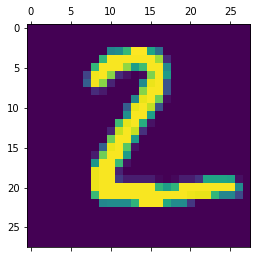

In [33]:
#predicting the value for a single image

plt.matshow(X_test[1])

In [30]:
y_predicted = model.predict(X_test_flattened) #running the prediction

In [34]:
y_predicted[1]

array([5.0016123e-01, 4.1692997e-03, 9.9916899e-01, 3.7882927e-01,
       6.7606187e-10, 8.6477596e-01, 8.9033669e-01, 6.2911433e-13,
       8.6513400e-02, 3.3519445e-09], dtype=float32)

In [36]:
np.argmax(y_predicted[1]) #predicted value

2

In [37]:
#lets build a confusion matrix

y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [41]:
#confusion matrix starts here

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [42]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   9,    8,  919,   21,    7,    3,   13,   10,   37,    5],
       [   4,    0,   15,  926,    1,   21,    2,   10,   20,   11],
       [   2,    1,    2,    1,  910,    0,   11,    4,    9,   42],
       [  11,    2,    2,   36,   11,  776,   15,    5,   27,    7],
       [  14,    3,    6,    1,    8,   15,  908,    2,    1,    0],
       [   1,    5,   21,    9,    7,    0,    0,  944,    2,   39],
       [  11,    7,    7,   25,    9,   34,    9,   11,  847,   14],
       [  11,    6,    1,    8,   19,    6,    0,   16,    6,  936]],
      dtype=int32)>

----->Lets create the same confusion matrix in a more appealing way for better understanding using seaborn library

Text(69.0, 0.5, 'Truth')

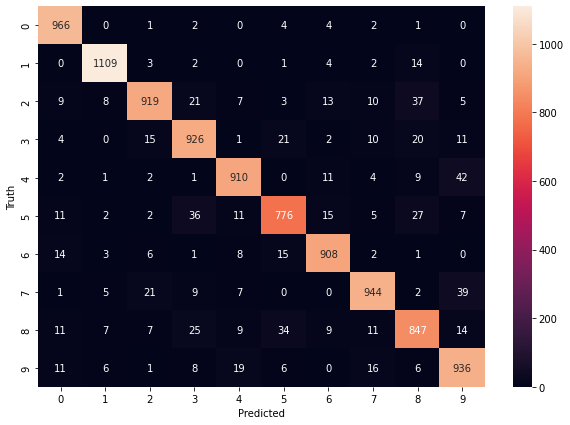

In [43]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
#lets add a hidden layer to the model

model = keras.Sequential([
           keras.layers.Dense(100, input_shape=(784,),activation='relu'),
           keras.layers.Dense(10,activation='sigmoid')       

])
#here sequential means layers are arranged in sequential in neural network and 
#Dense means all the neurons in the layer are connected to all the neurons in the other layer.
#10 is here the no.of output neurons, input_shape is used to tell the input of layer, activation function used is sigmoid for this layer


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#we need to compile the neural network 



model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2775 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1250 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9843


In [45]:
#evaluting how our model with hidden layer works with the testing data
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0781 - accuracy: 0.9770


[0.07807046175003052, 0.9769999980926514]

Text(69.0, 0.5, 'Truth')

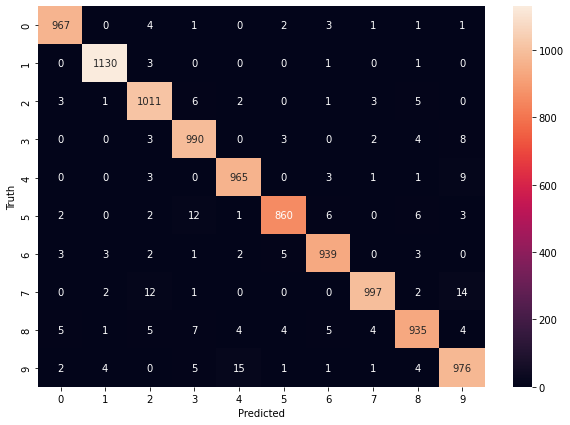

In [46]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
#here because of adding a hidden layer our model reached more accuracy and 
#hence reduced the errors as shown in confusion matrix above

In [ ]:

model = keras.Sequential([
           keras.layers.Dense(100, input_shape=(784,),activation='relu'),
           keras.layers.Dense(10,activation='sigmoid')       

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)